In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

def draw_uvw(H, ax, **kwargs):
    u = H[:3,0]
    v = H[:3,1]
    w = H[:3,2]
    o = H[:3,3]
    ax.quiver(o[0],o[1],o[2],u[0],u[1],u[2],color="r",**kwargs)
    ax.quiver(o[0],o[1],o[2],v[0],v[1],v[2],color="g",**kwargs)
    ax.quiver(o[0],o[1],o[2],w[0],w[1],w[2],color="b",**kwargs)
    

In [19]:
l1,l2 = 3, 3
t1,t2 = 30*pi/180, 30*pi/180

<IPython.core.display.Javascript object>


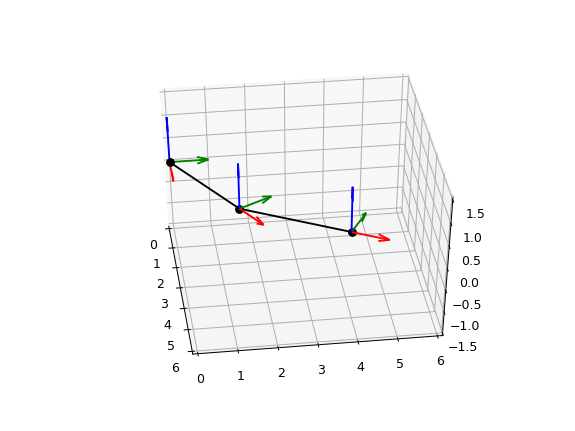

(0, 6)

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d')

T1_0 = dh(l1,0,0,t1)
T2_1 = dh(l2,0,0,t2)
T2_0 = np.dot(T1_0,T2_1)
A = np.array([T1_0[0][3], T1_0[1][3], T1_0[2][3]])
B = np.array([T2_0[0][3], T2_0[1][3], T2_0[2][3]])
ax.plot([0,A[0],B[0]],[0,A[1],B[1]],[0,A[2],B[2]], "-o", color="k")
draw_uvw(np.eye(4),ax)
draw_uvw(T1_0, ax)
draw_uvw(T2_0, ax)
ax.set_zlim([-1.5,1.5]);
ax.set_ylim([0, l1+l2])
ax.set_xlim([0, l1+l2])